Importing libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import math
import random
from sklearn.utils import resample

1.Importing dataset

In [25]:
df=pd.read_csv('adult.csv')
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Given column names

In [26]:
FeatureNames = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = FeatureNames

df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Checking datatypes

In [27]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

2.Clean the data to leave only the income and corresponding education. Other parameters are not needed.

In [28]:
df=df[['education','income']]

In [29]:
df['education'].isnull().sum()
df['income'].isnull().sum()

0

In [30]:
df['income']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: income, Length: 32560, dtype: object

3.Create the concrete incomes based on the dataset created in Task 2, where the income is defined as <=$50K, or >$50K. For each income <=$50K, then create a random number  r that is from [0.15 to 1.00], and then adjust the income to: income = r * $50K. For each income > $50K, then create a random number  r that is from [1.01 to 3.33], and then adjust the income to income = r * $50K.


In [31]:
def chage_income(income):
  print(len(income),income)
  if len(income) == 6:
    r= random.uniform(0.15,1.00)
    new_value = r*50000
  else:
    r = random.uniform(1.01,3.33)
    new_value = r*50000
  return new_value
df['income_value'] = df['income'].apply(chage_income)
  

6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
5  >50K
5  >50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <

6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K


6  <=50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K


5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=

5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
5  >50K
5  >50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K


5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
5  >50K
5  >50K
5  >5

6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6

6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K

6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >5

6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6

5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <

5  >50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K

6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=

6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K


6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6 

6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K

6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50

6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K

6  <=50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=5

5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <

5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K


6  <=50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K


5  >50K
5  >50K
5  >50K
6  <=50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=

5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=5

6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
5  >50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
5  >50K
5  >50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
6  <=50K
5  >50K
6  <=50K
6  <

/var/folders/3g/0fpl_pj94kq_5ljlsxmnm3y80000gn/T/ipykernel_5104/3539397312.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income_value'] = df['income'].apply(chage_income)


In [32]:
df['income_value']

0         30189.503483
1         47032.888311
2         17678.271990
3         35686.342449
4         21613.529258
             ...      
32555     39351.973931
32556    111260.625576
32557     44402.950872
32558     39886.651586
32559     94025.023285
Name: income_value, Length: 32560, dtype: float64

In [33]:
df2=df[['education','income_value']]
df2

,education,income_value
0,Bachelors,30189.503483
1,HS-grad,47032.888311
2,11th,17678.271990
3,Bachelors,35686.342449
4,Masters,21613.529258
...,...,...
32555,Assoc-acdm,39351.973931
32556,HS-grad,111260.625576
32557,HS-grad,44402.950872
32558,HS-grad,39886.651586


4.Visualize the distributions of the data on Income, and Education. In other words, you create two distributions: one in Income, and the other in Education. Calculate the mean and standard deviation of each distribution.

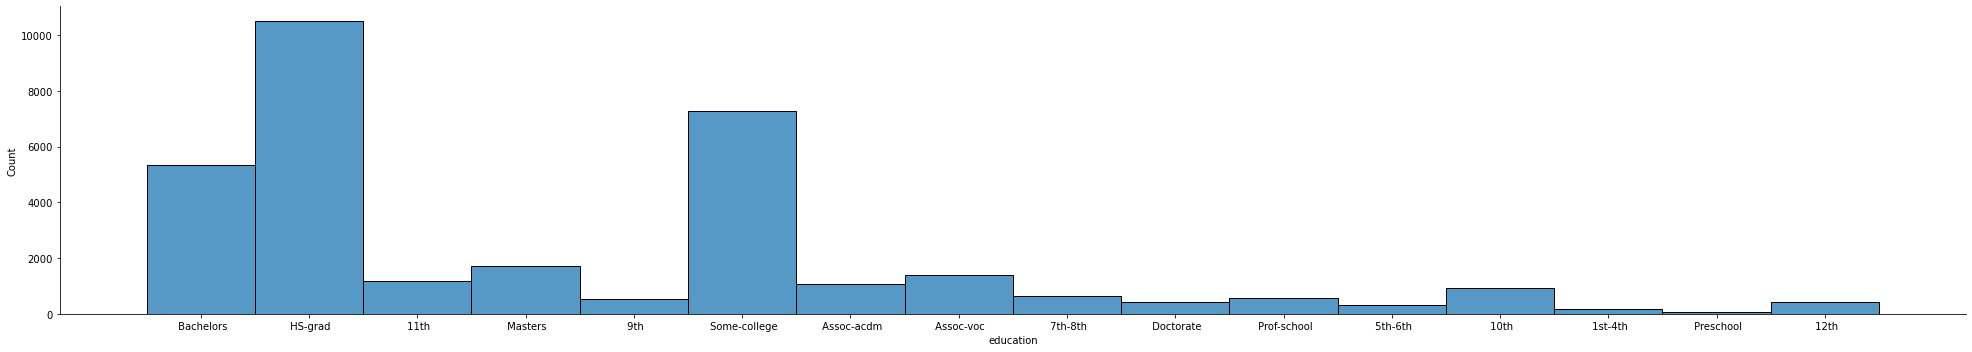

In [34]:
label_name = []
label_count = []

for idx, name in enumerate(df2["education"].value_counts().index.tolist()):
    #print('Name :', name)
    label_name.append(name)
    #print('Counts :', df2["education"].value_counts()[idx])
    label_count.append(df2["education"].value_counts()[idx])
#print(label_name)
#print(label_count)
mean_of_education = []
for value in label_count:
    mean = value/len(label_count)
    mean_of_education.append(mean)

sea.displot(data=df2,x="education",kind='hist',bins=100,aspect=5.5)

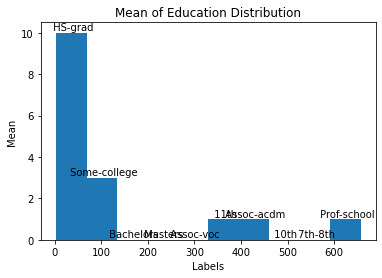

In [35]:
fig, ax = plt.subplots(1, 1)
ax.hist(mean_of_education)
  
# Set title
ax.set_title("Mean of Education Distribution")
  
# adding labels
ax.set_xlabel('Labels')
ax.set_ylabel('Mean')
  
# Make some labels.
rects = ax.patches
labels = label_name
  
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
            ha='center', va='bottom')

In [36]:

ls = []
for c in range(len(label_count)):
    diff = ((abs(mean_of_education[c]-label_count[c]))**2)
    ls.append(diff)
standar_deviation_education = (sum(ls)/len(label_count))**(1/2)
standar_deviation_education

3330.0746435099104

In [37]:
print("Mean of Education",mean_of_education)
print("Standar Deviation Education",standar_deviation_education)

Mean of Education [656.3125, 455.6875, 334.625, 107.6875, 86.375, 73.4375, 66.6875, 58.3125, 40.375, 36.0, 32.125, 27.0625, 25.8125, 20.8125, 10.5, 3.1875]
Standar Deviation Education 3330.0746435099104


In [38]:
mean_of_income = df2["income_value"].mean()
mean_of_income
income_ls = df2["income_value"].tolist()
std_ls = []
for income in income_ls:
    diff = (abs(income-mean_of_income)**2)
    std_ls.append(diff)
standar_deviation_income = (sum(std_ls)/len(std_ls))**(1/2)
standar_deviation_income

39286.44656961424

In [39]:
print("Mean of Income",mean_of_income)
print("Standar Deviation Income",standar_deviation_income)

Mean of Income 47985.84869531319
Standar Deviation Income 39286.44656961424


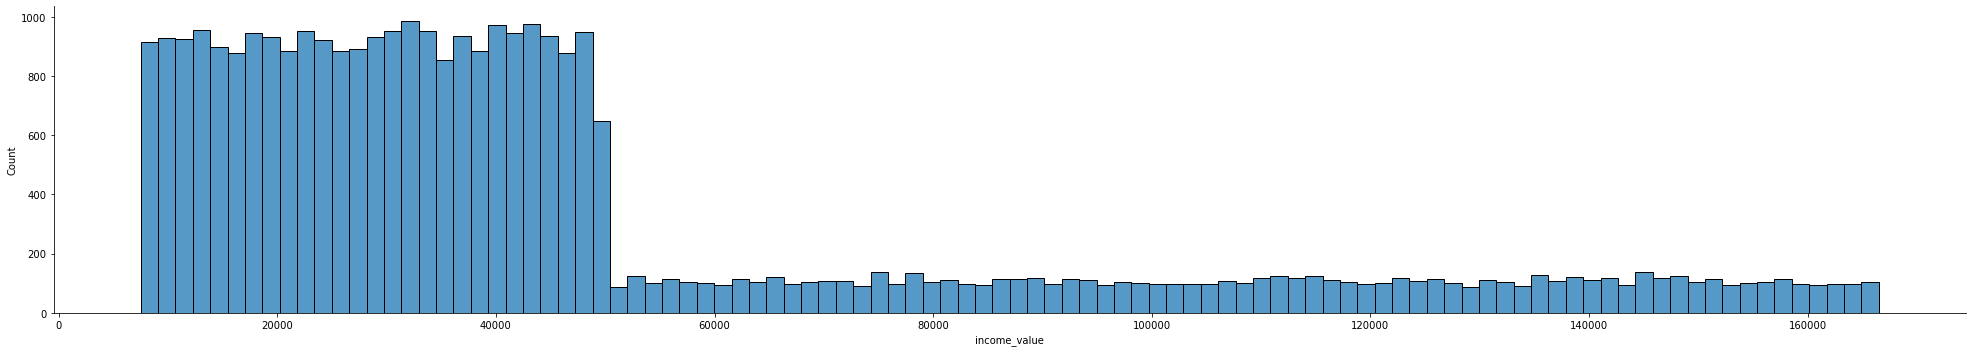

In [40]:
sea.displot(data=df2,x="income_value",kind='hist',bins=100,aspect=5.5)

5.Build a classifier to predict whether a person with an education level would make more than $50K annual income using  the Bayes' Rule: P(A|B) = P(B|A) x P(A) /P(B)  (but use the dataset you just developed to calculate the Likelihood P(B|A), Prior P(A) and Marginal  probability P(B).

In [41]:
x=df2[['education']]

In [42]:
y=df2['income_value'].apply(lambda b_value:1 if b_value>=50000 else 0)


In [43]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: income_value, Length: 32560, dtype: int64

In [44]:
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['education'])
x = encoder.fit_transform(df2['education']) 
x

,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,education_16
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
32556,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32557,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32558,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [47]:
from sklearn.naive_bayes import GaussianNB
NBclassifier=GaussianNB()
NBclassifier.fit(x_train,y_train)

GaussianNB()

In [48]:
y_pred=NBclassifier.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [49]:
from sklearn.metrics import confusion_matrix
confMatid3=confusion_matrix(y_test,y_pred)
confMatid3

array([[ 802, 4110],
       [  45, 1555]])

  6. Test the accuracy of the classifier 

In [50]:
from sklearn.metrics import accuracy_score
accScoreid3=accuracy_score(y_test,y_pred)
print("accuracy:",accScoreid3*100)

accuracy: 36.19471744471745


7.Use bootstrapping to develop 2000 training datasets, and then calculate the confidence interval for the prediction accuracy (with confidence around 95%).

In [52]:
accuracyScore = []
n_iterations = 2000
for i in range(n_iterations):
    X_bs, y_bs = resample(x_train, y_train, replace=True)
    y_preds = NBclassifier.predict(X_bs)
    score = accuracy_score(y_bs, y_preds)
    accuracyScore.append(score)
accuracyScore

[0.35952856265356264,
 0.3521191646191646,
 0.3576090294840295,
 0.34831848894348894,
 0.3573786855036855,
 0.35438421375921375,
 0.35891431203931207,
 0.3535396191646192,
 0.35334766584766586,
 0.3547681203931204,
 0.3566876535626536,
 0.35342444717444715,
 0.35776259213759215,
 0.36075706388206386,
 0.3523495085995086,
 0.35607340294840295,
 0.3528101965601966,
 0.359144656019656,
 0.3567644348894349,
 0.3583384520884521,
 0.35407708845208846,
 0.3553055896805897,
 0.35146652334152334,
 0.3590678746928747,
 0.3564189189189189,
 0.35584305896805896,
 0.3565340909090909,
 0.35192721130221133,
 0.3571867321867322,
 0.3571483415233415,
 0.3571867321867322,
 0.35503685503685506,
 0.3591830466830467,
 0.351504914004914,
 0.35396191646191644,
 0.3486640049140049,
 0.3560350122850123,
 0.36068028255528256,
 0.3521191646191646,
 0.3576858108108108,
 0.35407708845208846,
 0.3527718058968059,
 0.3566492628992629,
 0.3529637592137592,
 0.3546529484029484,
 0.35338605651105653,
 0.353808353808353

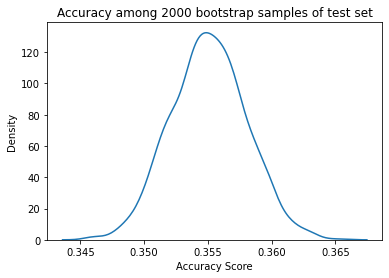

In [53]:
sea.kdeplot(accuracyScore)
plt.title("Accuracy among 2000 bootstrap samples of test set")
plt.xlabel("Accuracy Score")
plt.show()

In [54]:
median = np.percentile(accuracyScore, 50)
alpha = 100-95
lower_ci = np.percentile(accuracyScore, alpha/2)
upper_ci = np.percentile(accuracyScore, 100-alpha/2)

print(f"Model accuracy on the test set 2000 bootstrapped samples were used to calculate 95% confidence intervals.\n Median accuracy is {median:.2f} with a 95% a confidence interval of [{lower_ci:.2f},{upper_ci:.2f}].")

Model accuracy on the test set 2000 bootstrapped samples were used to calculate 95% confidence intervals.
 Median accuracy is 0.36 with a 95% a confidence interval of [0.35,0.36].
